In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PUNTO 1

In [2]:
def Transformada_Fourier(x,y,f):
    F=np.zeros_like(y,dtype=complex)
    for i in range(len(x)):
        F[i]=y[i]*np.exp(-2*np.pi*1j*x[i]*f)
    return np.sum(F)

## PUNTO 2 a

In [3]:
t_max=100
N=400
t=np.linspace(0,t_max,N)
f=lambda t:np.sin(2*np.pi*t*np.sqrt(2))
f_2=lambda t:np.sin(t) ###Prueba
y=f(t)
y_2=f(t) ###Prueba

In [4]:
Transformada_Fourier(t,y_2,0.1) ##Prueba

(0.7033663091899005-0.023275396684723004j)

## PUNTO 2 c

In [7]:
f_0=1/(t[1]-t[0])
frecuencias=np.arange(0,f_0,0.01)
def norma_transformada(frecuencias,t,y):
    F=np.zeros_like(frecuencias)
    for i,f in enumerate(frecuencias):
        F[i]=abs(Transformada_Fourier(t,y,f))
    return F
F=norma_transformada(frecuencias,t,y)

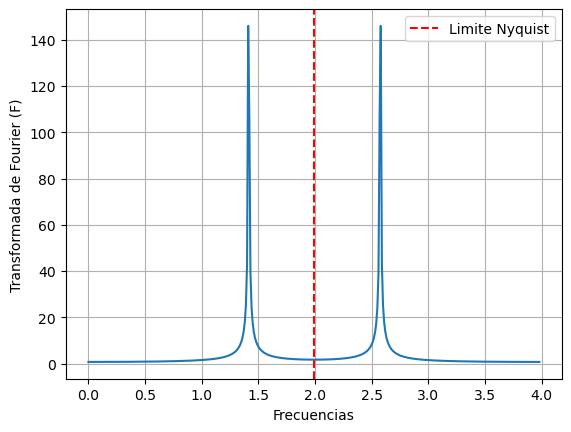

In [9]:
plt.plot(frecuencias,F)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

## PUNTO 2 D

In [13]:
##Ruido
ruido=np.random.normal(0.0,2,N)
y_new=ruido+y

In [14]:
F_new=norma_transformada(frecuencias,t,y_new)

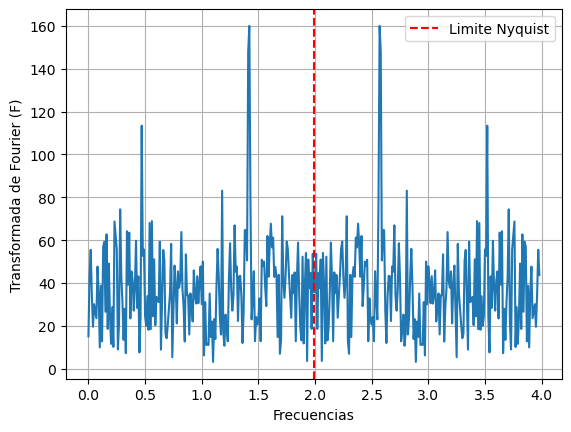

In [16]:
plt.plot(frecuencias,F_new)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.axvline(f_0/2,linestyle="--",color="r",label="Limite Nyquist")
plt.legend()
plt.grid()

Se evidencia una leve amplificación a las frecuencias bajas y ciertas variaciones en la grafica de Fourier respecto a frecuencia

In [18]:
def pico_FWHM(F,frecuencias):
    F2=F[:int(len(F)/2)]
    frecuencias_2=frecuencias[:int(len(F)/2)]
    indice_altura_max=np.where(F2==np.max(F2))
    altura_max=np.max(F2)
    altura_media=F2[indice_altura_max]/2.0
    resta=np.abs(F2-altura_media)
    valor_min=np.min(resta)
    resta_2=resta[resta>valor_min]
    valor_min_2=np.min(resta_2)
    i1=np.where(resta==valor_min)
    i2=np.where(resta==valor_min_2)
    distancia=np.abs(frecuencias[i1]-frecuencias[i2])
    return distancia[0], altura_max,indice_altura_max[0][0]

## PUNTO 3A

In [13]:
ancho,altura_maxima,posicion=pico_FWHM(F_new,frecuencias)
ancho,altura_maxima,posicion 

(0.019999999999999796, 145.6167735345898, 141)

### Cambio N (𝑡=20)

| N   | Ancho | x   |
| --- | ----- | --- |
| 100 | 0.12  | 141 |
| 200 | 0.12  | 141 |
| 300 | 0.12  | 141 |
| 400 | 0.12  | 141 |
| 500 | 0.12  | 141 |

El FWHM y la posición del pico principal en relación con el número de muestras \(N\) muestra que, para un rango temporal fijo, la resolución espectral alcanza un punto de estabilidad. El FWHM se mantiene constante para todos los valores de \(N\), lo que significa que un aumento en el número de muestras no mejora la resolución más allá de cierto límite, ya que la resolución de frecuencia ya es suficientemente alta para capturar la característica dominante de la señal. Esto se da ya que la resolución espectral en un análisis de Fourier depende del intervalo temporal ( $t$ ), y una vez que este intervalo es suficientemente largo, la frecuencia descifrable más baja se establece en ( $\Delta f = \frac{1}{t}$). Aumentar ($N$) en este punto solo detalla la gráfica pero no mejora la capacidad de distinguir entre componentes de frecuencia si ya se ha alcanzado una resolución adecuada. De igual manera, la posición del pico principal permanece invariable, lo que es coherente con la teoría, dado que la frecuencia dominante de la señal no depende del número de muestras, sino del rango temporal ( $t$).

### $3 B$  Cambio t (\(N = 400\))

| $t_{max}$ | Ancho | x   |
| ------- | ----- | --- |
| 5       | 0.24  | 141 |
| 10      | 0.12  | 141 |
| 20      | 0.059 | 141 |
| 50      | 0.029 | 141 |
| 100     | 0.019 | 141 |

El FWHM disminuye a medida que el rango temporal ( $t_{\max}$ ) aumenta, lo cual es esperado, ya que un mayor rango de tiempo permite una mejor resolución de frecuencias en la transformada de Fourier, dónde se ven las frecuencias bajas con mayor precisión y resultando en un pico más estrecho. En teoría significa que un mayor ($ t_{\max} $) permite distinguir mejor entre frecuencias cercanas. Sin embargo, una vez que la señal está lo suficientemente bien resuelta, aumentar ($ t_{\max} $) no cambia la precisión de la resolución. La posición del pico, sin embargo, se mantiene constante para todos los valores de ($ t_{\max} $), lo que indica que el rango temporal no afecta la frecuencia dominante tomada por la transformada de Fourier, esto sucede ya que la posición del pico está determinada por la frecuencia dominante propia a la señal y no por el rango temporal.

## PUNTO 4

In [28]:
N=80
ts_0=np.linspace(0,10,N)
ts=ts_0+np.random.normal(0.,0.01,N)
f=15
ys=np.sin(2*np.pi*ts*f)
dt=1/(ts[1]-ts[0])

In [29]:
Transformada_Fourier(ts,ys,dt)

(-0.26326888747619526+5.135788233613315j)

In [30]:
frecuencias=np.linspace(0,4*dt,10*N)
Fs=norma_transformada(frecuencias,ts,ys)

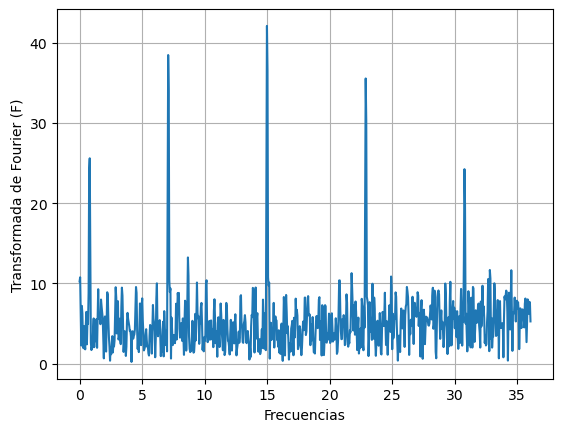

In [31]:
plt.plot(frecuencias,Fs)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier (F)")
plt.grid()

Es posible recuperar la señal original, ya que el ruido en la función atenúa las frecuencias falsas, dejando la frecuencia verdadera como la más prominente. En la gráfica anterior se puede observar el efecto del aliasing; sin embargo, la frecuencia principal, que en este caso es de 15 Hz, se destaca como el pico más predominante en comparación con las demás frecuencias. De este modo, aunque la frecuencia principal supere la frecuencia de Nyquist, si se realiza un análisis cuidadoso y se grafica repetidamente, es posible identificar la frecuencia verdadera.

## PUNTO 5

In [32]:
import pandas as pd

In [33]:
data="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
datos=pd.read_csv(data,delim_whitespace=True,header=None)
datos.columns=["t","y","$\sigma_y$"]
t_data=datos["t"]
y_data=datos["y"]
y_data-=np.mean(y_data)
frecuencias_data=np.arange(3,5,0.0001) 

In [ ]:
F_data=norma_transformada(frecuencias_data,t_data,y_data)
i_max=np.where(F_data==np.max(F_data))
frecuencia_señal=frecuencias_data[i_max][0]
frecuencia_señal

$\textit{La frecuencia principal de la señal es: 3.26 Hz}$

Text(0, 0.5, 'Transformada de Fourier (F)')

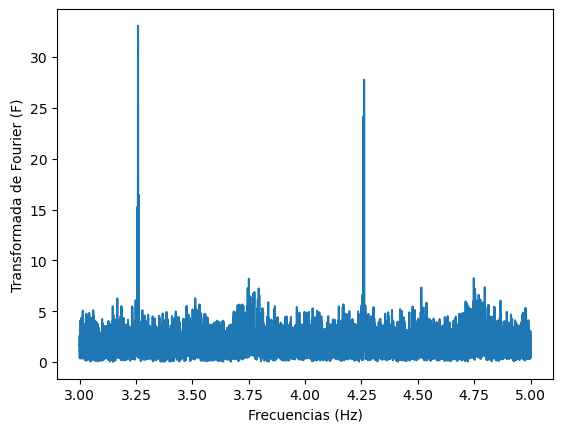

In [26]:
plt.plot(frecuencias_data,F_data)
plt.xlabel("Frecuencias (Hz)")
plt.ylabel("Transformada de Fourier (F)")

In [23]:
phi=np.mod(t_data*frecuencia_señal,1)

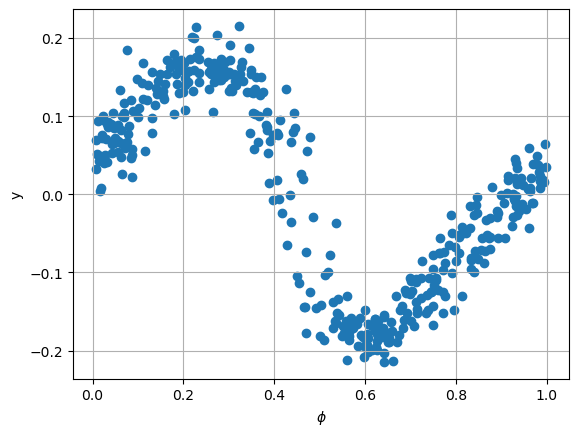

In [24]:
plt.scatter(phi,y_data)
plt.xlabel("$\phi$")
plt.ylabel("y")
plt.grid()

La gráfica de fase anterior revela la verdadera forma del comportamiento de los datos. En la función $\varphi$, al multiplicar cada punto de tiempo por la frecuencia principal, se calcula el avance temporal en términos de ciclos completos. Luego, con la operación $mod(f_{p} \cdot t, 1)$, se obtiene la fracción de un período completo, es decir, el valor dentro de un ciclo que varía entre 0 y 1. Esto permite visualizar el comportamiento real de los datos dentro de un ciclo periódico.